# Investments I: Fundamentals of Performance Evaluation
by Scott Weisbenner University of Illinois at Urbana-Champaign
## Module 1-6

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt

def V_p(w, rho, s):
    """Portfolio variance"""
    cov=s@s.T * rho
#     print(f'cov\n{cov}\nw\n{w}')
    V=np.sum(np.dot(cov, w) * w, axis=0)
#     print(f'V\n{np.reshape(V, (1,-1))}')
    return np.reshape(V, (1,-1))

def r_p(w, r):
    """Portfolio return"""
    return np.dot(r.T, w)

In [2]:
r=np.asfarray([[0.08], [0.15]])  # Large, small returns
s=np.asfarray([[0.25], [0.50]])  # Large, small std. dev. in returns

## Efficient Frontiers with Different Asset Correlations

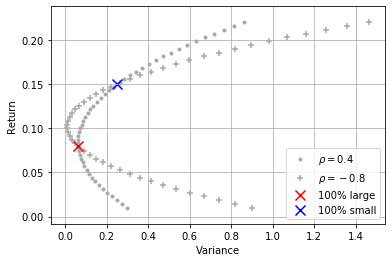

In [3]:
rho12=0.4
rho=np.asfarray([[1, rho12], [rho12, 1]])  # Correlation
w=[[x, 1-x] for x in np.linspace(-1, 2)]  # Portfolio weights, [large, small]
w = np.asfarray(w).T

# Calculate portfolio return and variance
_V=V_p(w, rho, s)
_r=r_p(w, r)

plt.xlabel('Variance')
plt.ylabel('Return')
plt.grid(True)

# Plot efficient frontier
p1=plt.scatter(_V, _r, marker='.', c='darkgray')

rho12=-0.8
rho=np.asfarray([[1, rho12], [rho12, 1]])  # Correlation
w=[[x, 1-x] for x in np.linspace(-1, 2)]  # Portfolio weights, [large, small]
w = np.asfarray(w).T

# Calculate portfolio return and variance
_V=V_p(w, rho, s)
_r=r_p(w, r)

plt.xlabel('Variance')
plt.ylabel('Return')
plt.grid(True)

# Plot efficient frontier
p2=plt.scatter(_V, _r, marker='+', c='darkgray')

# Plot 100% weights
lg=plt.scatter(V_p([1., 0.], rho, s), r_p([1., 0.], r), c='red', marker='x', s=100)  # 100% large
sm=plt.scatter(V_p([0., 1.], rho, s), r_p([0., 1.], r), c='blue', marker='x', s=100)  # 100% small
plt.legend((p1, p2, lg, sm), (r'$\rho=0.4$', r'$\rho=-0.8$', '100% large', '100% small'))
plt.show()

## Portfolio at Minimum Variance

In [4]:
# Solve for minimum variance
result=opt.minimize_scalar(lambda x: V_p([[x], [1-x]], rho, s)[0,0], bracket=(0.5, 0.51), method='brent')
print(result)
v=result.fun
x=result.x
print(f'Minimum variance {v:.3f}, minimum std. dev. {np.sqrt(v):.3f}')
print(f'Portfolio weights {x:.2f}, {1-x:.2f}', )
print(f'Return at minimum variance {r_p([[x], [1-x]], r)[0,0]:.3f}')
min_x=x

     fun: 0.010975609756097562
    nfev: 10
     nit: 4
 success: True
       x: 0.6829268292682994
Minimum variance 0.011, minimum std. dev. 0.105
Portfolio weights 0.68, 0.32
Return at minimum variance 0.102


## Portfolio with Same Variance as 100% Large Stocks

In [5]:
# Calculate maximum return of portfolio with same std. dev. as large
result = opt.root_scalar(lambda x: (V_p([[x], [1-x]], rho, s)[0,0]-s[0,0]**2), bracket=(min_x, 0.), method='brentq')
print(result)
x=result.root
print(f'Portfolio variance {V_p([[x], [1-x]], rho, s)[0,0]:.3f}, had better be {s[0,0]**2:.3f}')
print(f'Portfolio weights {x:.2f}, {1-x:.2f}')
print(f'Return {r_p([[x], [1-x]], r)[0,0]:.3f}')

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.36585365853658536
Portfolio variance 0.062, had better be 0.062
Portfolio weights 0.37, 0.63
Return 0.124


## Difference in Risk between Portfolios with Fixed Allocations

In [6]:
# Calculate std. dev. for portfolio with w=[-0.71, 1.71] and rho12=(0,4, -0.8)
w=[[-0.71],[1.71]]

rho12=0.4
rho=np.asfarray([[1, rho12], [rho12, 1]])  # Correlation
V1=V_p(w, rho, s)[0,0]

rho12=-0.8
rho=np.asfarray([[1, rho12], [rho12, 1]])  # Correlation
V2=V_p(w, rho, s)[0,0]

print(f'Std. dev. at correlation=0.4 {np.sqrt(V1):.3f}')
print(f'Std. dev. at correlation=-0.8 {np.sqrt(V2):.3f}')
print(f'Diff {np.sqrt(V2)-np.sqrt(V1):.3f}')

Std. dev. at correlation=0.4 0.801
Std. dev. at correlation=-0.8 1.003
Diff 0.202
